FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/01_spread_vs_liquidity.png'

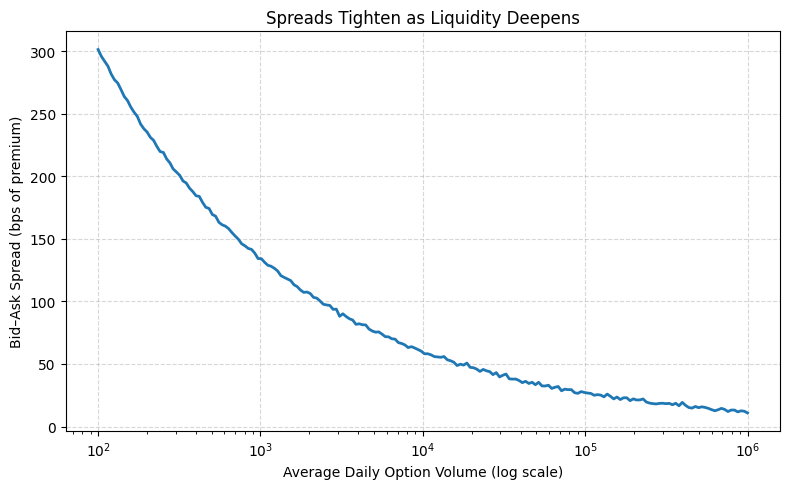

In [1]:
# Synthetic diagrams explaining structural drivers of option bid–ask spreads
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

np.random.seed(42)

# 1) Spread vs Liquidity (Average Daily Option Volume)
volumes = np.logspace(2, 6, 200)  # 1e2 to 1e6 contracts/day
spread_vol_bps = 60 * (volumes / 1e4) ** (-0.35) + np.random.normal(0, 1, size=volumes.size)
spread_vol_bps = np.clip(spread_vol_bps, 1, None)

fig1 = plt.figure(figsize=(8, 5))
plt.plot(volumes, spread_vol_bps, linewidth=2)
plt.xscale('log')
plt.xlabel('Average Daily Option Volume (log scale)')
plt.ylabel('Bid–Ask Spread (bps of premium)')
plt.title('Spreads Tighten as Liquidity Deepens')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
fig1_path = '/mnt/data/01_spread_vs_liquidity.png'
plt.savefig(fig1_path, dpi=160)
plt.show()

# 2) Spread vs Distance from ATM (Moneyness)
dist_atm_pct = np.linspace(0, 0.35, 200)  # 0% to 35% from ATM
spread_moneyness_bps = 8 + 220 * (dist_atm_pct ** 1.2) + np.random.normal(0, 1, size=dist_atm_pct.size)
spread_moneyness_bps = np.clip(spread_moneyness_bps, 2, None)

fig2 = plt.figure(figsize=(8, 5))
plt.plot(dist_atm_pct * 100, spread_moneyness_bps, linewidth=2)
plt.xlabel('Distance from ATM (%)')
plt.ylabel('Bid–Ask Spread (bps of premium)')
plt.title('Spreads Widen as Options Move Away from the Money')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
fig2_path = '/mnt/data/02_spread_vs_moneyness.png'
plt.savefig(fig2_path, dpi=160)
plt.show()

# 3) Spread vs Time to Expiry (DTE)
dte_days = np.linspace(1, 720, 200)  # 1 day to ~2 years
spread_dte_bps = 10 + 0.25 * np.sqrt(dte_days) + np.random.normal(0, 0.8, size=dte_days.size)
spread_dte_bps = np.clip(spread_dte_bps, 3, None)

fig3 = plt.figure(figsize=(8, 5))
plt.plot(dte_days, spread_dte_bps, linewidth=2)
plt.xlabel('Days to Expiry (DTE)')
plt.ylabel('Bid–Ask Spread (bps of premium)')
plt.title('Longer-Dated Options Often Carry Wider Spreads')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
fig3_path = '/mnt/data/03_spread_vs_dte.png'
plt.savefig(fig3_path, dpi=160)
plt.show()

# 4) Spread vs Hedging Ease (Index from 0=Hard to 1=Easy)
hedge_ease = np.linspace(0, 1, 200)
spread_hedge_bps = 35 - 22 * (hedge_ease ** 0.8) + np.random.normal(0, 0.5, size=hedge_ease.size)
spread_hedge_bps = np.clip(spread_hedge_bps, 2, None)

fig4 = plt.figure(figsize=(8, 5))
plt.plot(hedge_ease, spread_hedge_bps, linewidth=2)
plt.xlabel('Hedging Ease (0 = hard, 1 = easy)')
plt.ylabel('Bid–Ask Spread (bps of premium)')
plt.title('Easier Hedging Supports Tighter Spreads')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
fig4_path = '/mnt/data/04_spread_vs_hedging_ease.png'
plt.savefig(fig4_path, dpi=160)
plt.show()

# 5) Order Book Depth vs Spread (Scatter with fitted curve)
depth_levels = np.linspace(2, 250, 180)
true_spread_depth = 55 * (depth_levels ** -0.35) + 2
noise = np.random.normal(0, 0.8, size=depth_levels.size)
spread_depth_bps = np.clip(true_spread_depth + noise, 1, None)

coeffs = np.polyfit(depth_levels, spread_depth_bps, 2)  # quadratic fit for smooth trend
trend = np.polyval(coeffs, depth_levels)

fig5 = plt.figure(figsize=(8, 5))
plt.scatter(depth_levels, spread_depth_bps, s=18, alpha=0.7)
plt.plot(depth_levels, trend, linewidth=2)
plt.xlabel('Order Book Depth (levels quoted)')
plt.ylabel('Bid–Ask Spread (bps of premium)')
plt.title('Deeper Books Correlate with Narrower Spreads')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
fig5_path = '/mnt/data/05_spread_vs_depth.png'
plt.savefig(fig5_path, dpi=160)
plt.show()

# 6) Product Comparison: Deep vs Shallow Market Across Moneyness
moneyness = np.linspace(-0.35, 0.35, 300)
base_curve = 7 + 120 * (np.abs(moneyness) ** 1.1)
deep_market = base_curve * 0.7 + np.random.normal(0, 0.4, size=moneyness.size)
shallow_market = base_curve * 1.4 + np.random.normal(0, 0.6, size=moneyness.size)

fig6 = plt.figure(figsize=(8, 5))
plt.plot(moneyness * 100, deep_market, linewidth=2, label='Deep Market')
plt.plot(moneyness * 100, shallow_market, linewidth=2, label='Shallow Market')
plt.xlabel('Moneyness (% from ATM; negative = ITM puts / positive = ITM calls)')
plt.ylabel('Bid–Ask Spread (bps of premium)')
plt.title('Products with Deeper Markets Maintain Tighter Spreads Across Strikes')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
fig6_path = '/mnt/data/06_product_comparison.png'
plt.savefig(fig6_path, dpi=160)
plt.show()

# Save all figures to a single PDF for download
pdf_path = '/mnt/data/option_spreads_explainer_diagrams.pdf'
with PdfPages(pdf_path) as pdf:
    for fig in [fig1, fig2, fig3, fig4, fig5, fig6]:
        pdf.savefig(fig, dpi=200, bbox_inches='tight')

(fig1_path, fig2_path, fig3_path, fig4_path, fig5_path, fig6_path, pdf_path)
